#                  **PCA**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [5]:
rawdata=pd.read_csv('/content/wine (1).csv')

In [6]:
df=rawdata.copy()

In [7]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df['Type'].unique()

array([1, 2, 3])

In [9]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
x=df.iloc[:,1:]

In [11]:
x.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
x_norm=scale(x)

In [13]:
x_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [18]:
x_norm.shape

(178, 13)

In [14]:
pca=PCA(n_components=3)

In [15]:
pca_values=pca.fit_transform(x_norm)

In [17]:
pca_values.shape

(178, 3)

In [19]:
var=pca.explained_variance_ratio_

In [20]:
var

array([0.36198848, 0.1920749 , 0.11123631])

In [21]:
cumsumvar=np.cumsum(np.round(var,decimals=4)*100)

In [22]:
cumsumvar

array([36.2 , 55.41, 66.53])

In [25]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

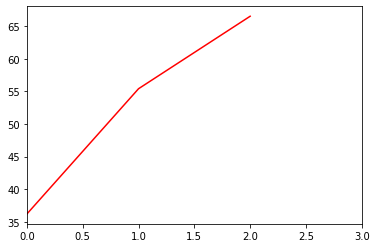

In [28]:
plt.xlim(0,3,1)
plt.plot(cumsumvar,color="red")


In [30]:
finaldf=pd.DataFrame(pca_values,columns=['pc1','pc2','pc3'])

In [31]:
finaldf.head()

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


# **Hierarchical Clustering**

In [32]:
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [34]:
finaldf.shape

(178, 3)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


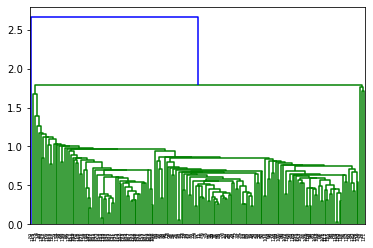

In [37]:
dendogram=sch.dendrogram(sch.linkage(finaldf,method='single'))

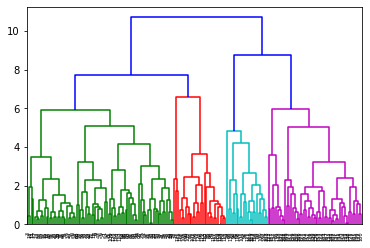

In [38]:
dendogram=sch.dendrogram(sch.linkage(finaldf,method='complete'))

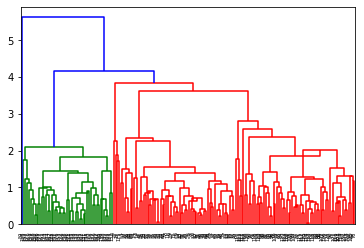

In [39]:
dendogram=sch.dendrogram(sch.linkage(finaldf,method='centroid'))

In [68]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

In [69]:
y_hc=hc.fit_predict(finaldf)

In [70]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [71]:
hierdf=finaldf.copy()
hierdf['clusterid']=y_hc

In [72]:
hierdf

,pc1,pc2,pc3,clusterid
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,0
174,-2.601956,-1.757229,0.207581,0
175,-2.677839,-2.760899,-0.940942,0
176,-2.387017,-2.297347,-0.550696,0


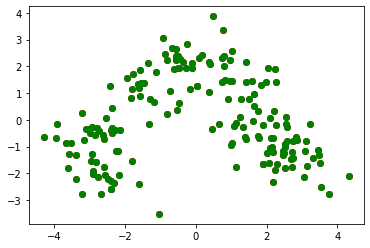

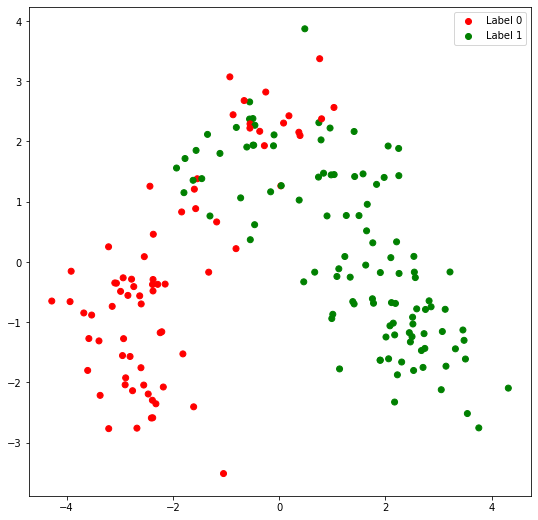

In [73]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
#colours[2] = 'b'
  
# Building the colour vector for each data point
cvec = [colours[label] for label in y_hc ]
r = plt.scatter(hierdf['pc1'], hierdf['pc2'], color ='r');
g = plt.scatter(hierdf['pc1'], hierdf['pc2'], color ='g');
#b = plt.scatter(hierdf['pc1'], hierdf['pc2'], color ='b');
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(hierdf['pc1'], hierdf['pc2'], c = cvec)
  
# Building the legend
plt.legend((r, g , ), ('Label 0', 'Label 1', ))
  
plt.show()

In [74]:
hierdf['clusterid'].unique()

array([1, 0])

From hierarchical clustering we can make two clusters

# **K-MEANS CLUSTERING**

In [43]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

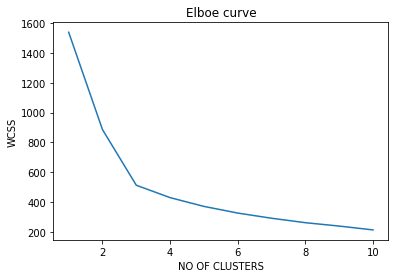

In [45]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(finaldf)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elboe curve')
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [46]:
model=KMeans(n_clusters=5)
model.fit(finaldf)
model.labels_


array([4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2,
       4, 2, 2, 2, 4, 1, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 1, 4, 4, 1, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 0, 1, 1, 3, 2,
       1, 1, 3, 1, 3, 2, 3, 2, 1, 1, 1, 3, 1, 3, 1, 1, 3, 0, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 2,
       1, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [60]:
kmeandf=finaldf.copy()
md=pd.Series(model.labels_)
kmeandf['kClusterid']=md
kmeandf.head()

,pc1,pc2,pc3,kClusterid
0,3.316751,-1.443463,-0.165739,4
1,2.209465,0.333393,-2.026457,4
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,4
4,1.008908,-0.869831,2.026688,2


In [76]:
kmeandf.groupby('kClusterid').mean()

,pc1,pc2,pc3
kClusterid,,,
0,-2.720036,-1.125651,-0.239093
1,0.741509,1.883781,-0.837986
2,1.606351,-0.248978,1.363312
3,-0.775177,1.610094,0.819274
4,2.621777,-1.179778,-0.500363


In [80]:
k_labels =kmeandf['kClusterid'].unique()
k_labels

array([4, 2, 1, 3, 0], dtype=int32)

5 Clusters can be formed using KMEANS clustering